In [1]:
DATA_DIR = '../../data/' # for local
# DATA_DIR = 'drive/My Drive/colab/' # for colab

In [2]:
from nilearn.input_data import NiftiMasker
from nilearn.datasets import load_mni152_brain_mask
import os
import glob
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import classification_common
import joblib

#To ensure reproducibility
np.random.seed(39)

/Users/hasnainmamdani/Academics/McGill/thesis/scikit-learn/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/hasnainmamdani/Academics/McGill/thesis/scikit-learn/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/hasnainmamdani/Academics/McGill/thesis/scikit-learn/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.

In [3]:
# load lesion load matrix 
lesion_load_matrix = np.load(DATA_DIR + 'lesions_load_matrix_absolute.npy')
print(lesion_load_matrix.shape)

# take log of lesion loads
lesion_load_df = pd.DataFrame(lesion_load_matrix)
lesion_load_log_df = np.log(1+lesion_load_df)

(1401, 144)


In [4]:
#patient_df.to_hdf(DATA_DIR + 'patients.h5', key='p', mode='w')
patient_df = pd.read_hdf(DATA_DIR + 'patients.h5', 'p')

In [5]:
scaler_X = StandardScaler()
X = scaler_X.fit_transform(lesion_load_log_df)
X.shape

(1401, 144)

In [6]:
scaler_Y = StandardScaler()
Y = scaler_Y.fit_transform(np.array(patient_df[patient_df.columns[5:11]]))
Y.shape

(1401, 6)

In [7]:
# sort the outcomes
if not os.path.isfile(DATA_DIR + 'Y_sort_idx.npy'):    
    Y_sort_idx = np.empty(Y.shape, dtype=int)
    for i in range(Y.shape[1]):
        Y_sort_idx[:, i] = np.argsort(Y[:, i])

    # save for consistency in future analysis
    np.save(DATA_DIR + 'Y_sort_idx', Y_sort_idx)
    
else:
    Y_sort_idx = np.load(DATA_DIR + 'Y_sort_idx.npy')
    
print(Y_sort_idx.shape)

(1401, 6)


### Classification

#### 1- Logistic Regression

In [8]:
def run_logistic_regression_clf(X, Y, Y_sort_idx):
    
    estimator = LogisticRegression(random_state = 39, max_iter=20000)
    C = np.logspace(-1, 10, 12)
    grid = {'C': C}
    
    return classification_common.run_classification(X, Y, Y_sort_idx,estimator, grid, "Logistic Regression")

In [9]:
scores_df_lr, best_params_df_lr = run_logistic_regression_clf(X, Y, Y_sort_idx)


Global Cognition

Data % used: 100.0%
Fold-1: Best params: {'C': 100000.0}
Fold-2: Best params: {'C': 1000000.0}
Fold-3: Best params: {'C': 100.0}
Fold-4: Best params: {'C': 10000.0}
Fold-5: Best params: {'C': 100000.0}
Data % used: 60.0%
Fold-1: Best params: {'C': 100.0}
Fold-2: Best params: {'C': 10000000000.0}
Fold-3: Best params: {'C': 1000.0}
Fold-4: Best params: {'C': 100000000.0}
Fold-5: Best params: {'C': 1000.0}
Data % used: 40.0%
Fold-1: Best params: {'C': 1000.0}
Fold-2: Best params: {'C': 10000.0}
Fold-3: Best params: {'C': 100.0}
Fold-4: Best params: {'C': 100.0}
Fold-5: Best params: {'C': 100000000.0}
Data % used: 20.0%
Fold-1: Best params: {'C': 100.0}
Fold-2: Best params: {'C': 1.0}
Fold-3: Best params: {'C': 1.0}
Fold-4: Best params: {'C': 1000000000.0}
Fold-5: Best params: {'C': 100.0}

Language

Data % used: 100.0%
Fold-1: Best params: {'C': 100.0}
Fold-2: Best params: {'C': 10000000000.0}
Fold-3: Best params: {'C': 1000.0}
Fold-4: Best params: {'C': 100.0}
Fold-5: 

/Users/hasnainmamdani/Academics/McGill/thesis/scikit-learn/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold-4: Best params: {'C': 100000000.0}
Fold-5: Best params: {'C': 1000.0}
Data % used: 20.0%
Fold-1: Best params: {'C': 10000000.0}
Fold-2: Best params: {'C': 1000000.0}
Fold-3: Best params: {'C': 1000.0}
Fold-4: Best params: {'C': 10000.0}
Fold-5: Best params: {'C': 1000000.0}

Memory

Data % used: 100.0%
Fold-1: Best params: {'C': 10000.0}
Fold-2: Best params: {'C': 1000.0}
Fold-3: Best params: {'C': 100.0}
Fold-4: Best params: {'C': 10000.0}
Fold-5: Best params: {'C': 10000000.0}
Data % used: 60.0%
Fold-1: Best params: {'C': 1000.0}
Fold-2: Best params: {'C': 100.0}
Fold-3: Best params: {'C': 100.0}
Fold-4: Best params: {'C': 1000.0}
Fold-5: Best params: {'C': 1000.0}
Data % used: 40.0%
Fold-1: Best params: {'C': 1000000.0}
Fold-2: Best params: {'C': 100000.0}
Fold-3: Best params: {'C': 10.0}
Fold-4: Best params: {'C': 1000000000.0}
Fold-5: Best params: {'C': 10000.0}
Data % used: 20.0%
Fold-1: Best params: {'C': 1000.0}
Fold-2: Best params: {'C': 1000000.0}
Fold-3: Best params: {'

/Users/hasnainmamdani/Academics/McGill/thesis/scikit-learn/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold-3: Best params: {'C': 1000000000.0}
Fold-4: Best params: {'C': 100000.0}
Fold-5: Best params: {'C': 10000.0}
Data % used: 20.0%
Fold-1: Best params: {'C': 10000000.0}
Fold-2: Best params: {'C': 1000000.0}
Fold-3: Best params: {'C': 10000000.0}
Fold-4: Best params: {'C': 1000.0}
Fold-5: Best params: {'C': 10000.0}

Executive Functioning

Data % used: 100.0%
Fold-1: Best params: {'C': 1000.0}
Fold-2: Best params: {'C': 100000000.0}
Fold-3: Best params: {'C': 100.0}
Fold-4: Best params: {'C': 100.0}
Fold-5: Best params: {'C': 1000.0}
Data % used: 60.0%
Fold-1: Best params: {'C': 100000.0}
Fold-2: Best params: {'C': 100000000.0}
Fold-3: Best params: {'C': 10.0}
Fold-4: Best params: {'C': 100.0}
Fold-5: Best params: {'C': 10000000000.0}
Data % used: 40.0%
Fold-1: Best params: {'C': 10000000000.0}
Fold-2: Best params: {'C': 1000.0}
Fold-3: Best params: {'C': 10000.0}
Fold-4: Best params: {'C': 10000.0}
Fold-5: Best params: {'C': 100.0}
Data % used: 20.0%
Fold-1: Best params: {'C': 10.0}

#### 2- Random Forest

In [10]:
def run_random_forest_clf(X, Y, Y_sort_idx):
    
    estimator = RandomForestClassifier(random_state = 39)
    
    n_estimators = [50, 100, 300, 500, 700, 900, 1100, 1300, 1500, 1700]
    max_features = ['auto', 'sqrt', 'log2']
    max_depth = [5, 10, 20, 30, 40, 50, 60, 70, 100, None]
    min_samples_split = [2, 5, 7, 10, 15]
    min_samples_leaf = [1, 2, 4]
    max_samples = [0.3, 0.4, 0.5, 0.8, 0.9, None]
    
    grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples': max_samples}

    
    return classification_common.run_classification(X, Y, Y_sort_idx, estimator, grid, "Random Forest", random_search_cv=True)
    

In [11]:
scores_df_rf, best_params_df_rf = run_random_forest_clf(X, Y, Y_sort_idx)


Global Cognition

Data % used: 100.0%
Fold-1: Best params: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 'auto', 'max_depth': 60}
Fold-2: Best params: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 'auto', 'max_depth': 60}
Fold-3: Best params: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 'auto', 'max_depth': 60}
Fold-4: Best params: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 'auto', 'max_depth': 60}
Fold-5: Best params: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 'auto', 'max_depth': 60}
Data % used: 60.0%
Fold-1: Best params: {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': 0.8, 'max_features': 'log2', 'max_depth': 50}
Fold-2: Best params: {'n_estima

#### Plot results

In [14]:
scores_df_all = pd.concat([scores_df_lr, scores_df_rf], ignore_index=True)

# persist results
scores_df_all.to_hdf('results/results_atlas_single_output.h5', key='p', mode='w')
# scores_df_all = pd.read_hdf('results/results_atlas_single_output.h5', key='p', mode='r')

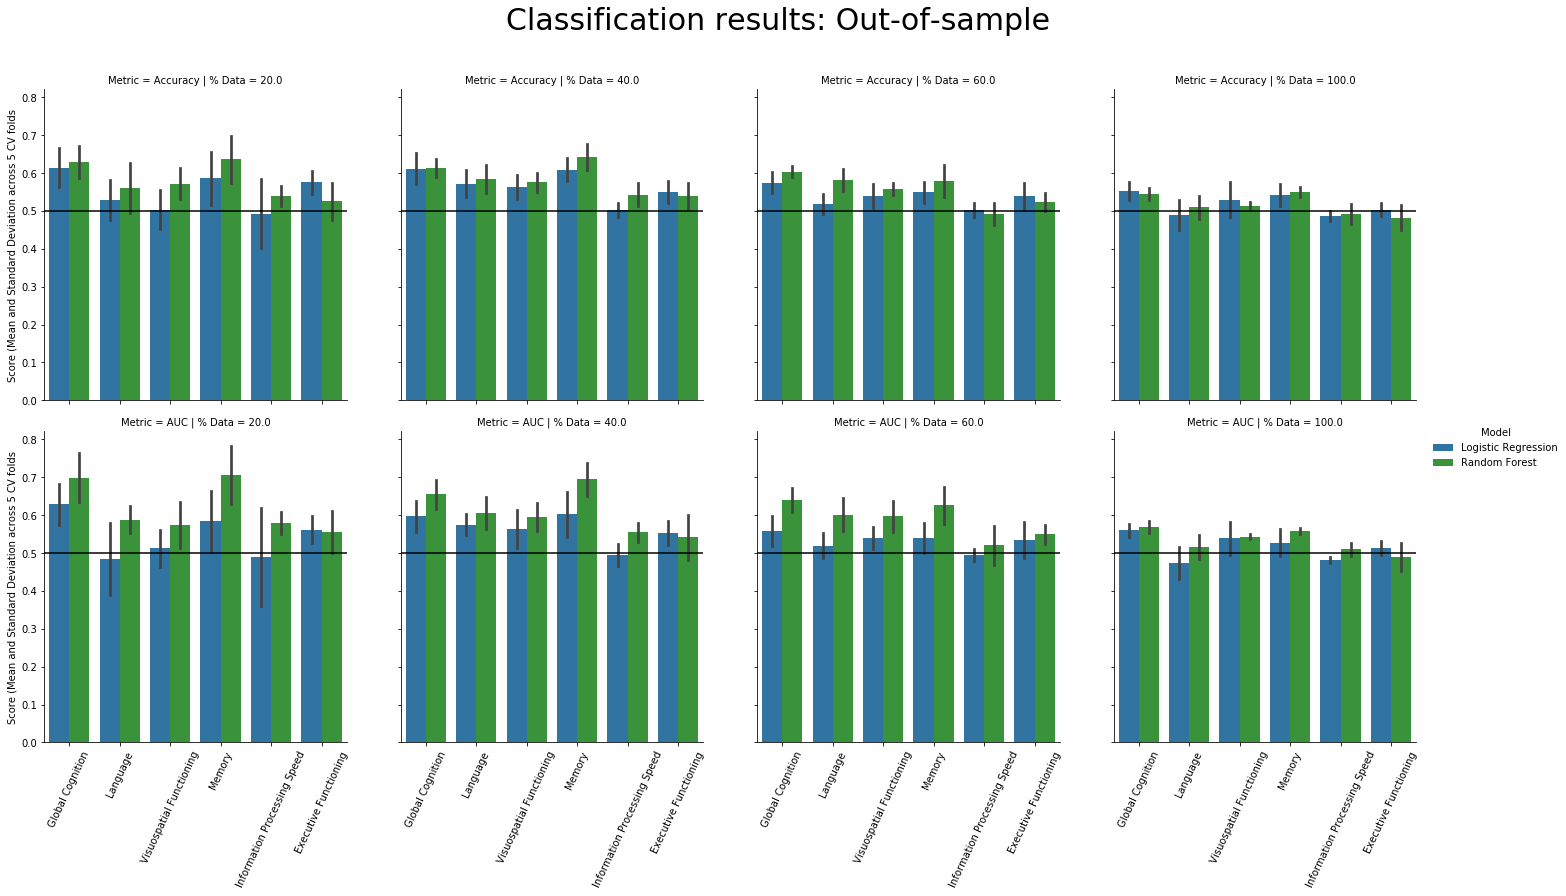

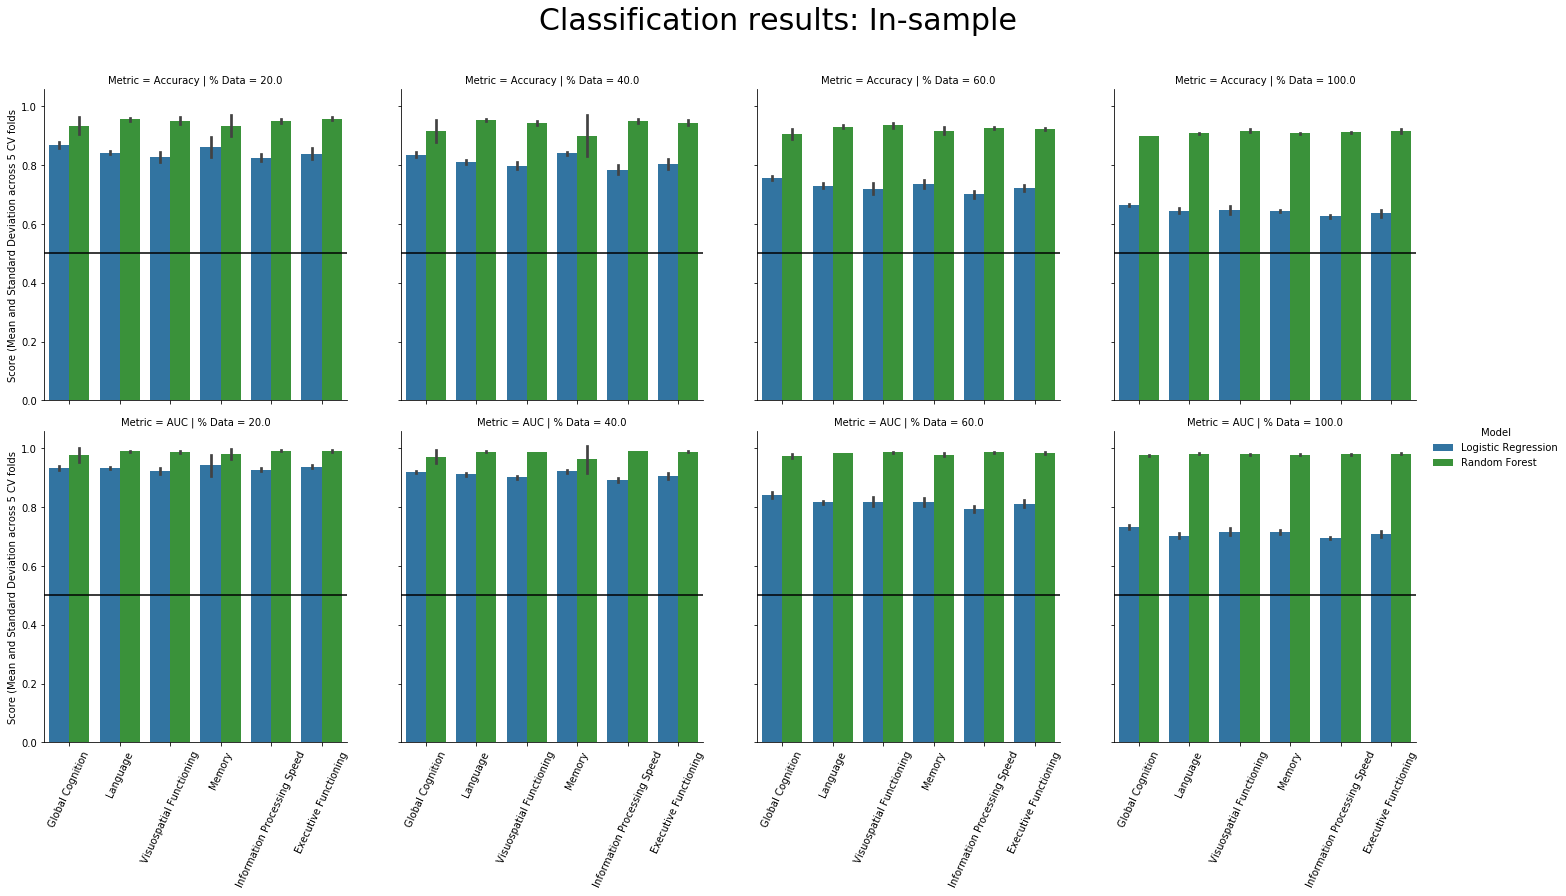

In [13]:
# plot results
classification_common.plot_all_scores(scores_df_all)